# Predictive Maintenance Oil and Gas Pipeline Data 

![](https://www.ruangenergi.com/wp-content/uploads/2022/03/WhatsApp-Image-2022-02-26-at-17.17.08-e1647438633554.jpeg)

## Import Library 

In [1]:
# Core
import os
import random
from pathlib import Path

# Data & numeric
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# ----------------
# Reproducibility
# ----------------
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)
os.environ["PYTHONHASHSEED"] = str(RANDOM_STATE)

# ----------------
# Paths (Colab)
# ----------------
DATA_DIR = Path("/content/data")
DATA_DIR.mkdir(parents=True, exist_ok=True)

# Ganti nama file jika perlu
DATA_PATH = "/kaggle/input/predictive-maintenance-oil-and-gas-pipeline-data/market_pipe_thickness_loss_dataset.csv"

# ----------------
# Display & style
# ----------------
pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", lambda x: f"{x:.4f}")

plt.rcParams["figure.figsize"] = (10, 5)
sns.set(style="whitegrid")

print("Section 1 ready")
print(f"Data path  : {DATA_PATH}")
print(f"Random seed: {RANDOM_STATE}")

# buat warnings 
import warnings 
warnings.filterwarnings('ignore')

Section 1 ready
Data path  : /kaggle/input/predictive-maintenance-oil-and-gas-pipeline-data/market_pipe_thickness_loss_dataset.csv
Random seed: 42


## Data Loading and Quick Look

### Load Dataset 

In [2]:
# Load dataset
df = pd.read_csv(DATA_PATH)

print("Dataset berhasil dimuat")
print("Jumlah baris dan kolom:", df.shape)

Dataset berhasil dimuat
Jumlah baris dan kolom: (1000, 11)


In [3]:
df.head()

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.4800,Carbon Steel,ASTM A333 Grade 6,300,84.9000,16.0400,4.9100,31.7200,2,Moderate
1,800,22.0000,PVC,ASTM A106 Grade B,150,14.1000,7.3800,7.3200,33.2700,4,Critical
2,400,12.0500,Carbon Steel,API 5L X52,2500,0.6000,2.1200,6.3200,52.4500,7,Critical
3,1500,38.7200,Carbon Steel,API 5L X42,1500,52.7000,5.5800,6.2000,16.0100,19,Critical
4,1500,24.3200,HDPE,API 5L X65,1500,11.7000,12.2900,8.5800,35.2800,20,Critical


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pipe_Size_mm              1000 non-null   int64  
 1   Thickness_mm              1000 non-null   float64
 2   Material                  1000 non-null   object 
 3   Grade                     1000 non-null   object 
 4   Max_Pressure_psi          1000 non-null   int64  
 5   Temperature_C             1000 non-null   float64
 6   Corrosion_Impact_Percent  1000 non-null   float64
 7   Thickness_Loss_mm         1000 non-null   float64
 8   Material_Loss_Percent     1000 non-null   float64
 9   Time_Years                1000 non-null   int64  
 10  Condition                 1000 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB


### Statistik deskriptif 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pipe_Size_mm,1000.0000,522.0000,443.7036,50.0000,150.0000,300.0000,800.0000,1500.0000
Thickness_mm,1000.0000,16.0735,10.5484,3.0000,7.3575,12.9300,23.0275,49.5300
Max_Pressure_psi,1000.0000,1004.1000,812.8431,150.0000,300.0000,900.0000,1500.0000,2500.0000
Temperature_C,1000.0000,42.5956,41.1271,-50.0000,13.4000,41.2000,69.1500,149.7000
Corrosion_Impact_Percent,1000.0000,9.7460,5.8175,0.0000,4.4925,9.7200,14.8325,20.0000
Thickness_Loss_mm,1000.0000,4.8863,2.9011,0.0100,2.3650,4.9150,7.4325,9.9900
Material_Loss_Percent,1000.0000,46.7476,46.6026,0.0800,15.6650,31.6600,61.0350,318.7500
Time_Years,1000.0000,12.9610,7.1360,1.0000,7.0000,13.0000,19.0000,25.0000


### Cek Missing Value 

In [6]:
# Missing values
df.isnull().sum()

Pipe_Size_mm                0
Thickness_mm                0
Material                    0
Grade                       0
Max_Pressure_psi            0
Temperature_C               0
Corrosion_Impact_Percent    0
Thickness_Loss_mm           0
Material_Loss_Percent       0
Time_Years                  0
Condition                   0
dtype: int64

dapat dilihat bahwa tidak ada missing value yang ada pada dataset tersebut 

### Cek Duplikat

In [7]:
# Duplikasi
df.duplicated().sum()

np.int64(0)

tidak ada data yang terduplikasi 

### quick distribution check 

In [8]:
key_columns = ["Material", "Grade", "Condition"]

for col in key_columns:
    if col in df.columns:
        print(f"\nDistribusi nilai untuk kolom: {col}")
        display(df[col].value_counts())


Distribusi nilai untuk kolom: Material


Material
Fiberglass         219
Carbon Steel       210
Stainless Steel    201
PVC                186
HDPE               184
Name: count, dtype: int64


Distribusi nilai untuk kolom: Grade


Grade
ASTM A333 Grade 6    228
ASTM A106 Grade B    212
API 5L X52           191
API 5L X42           186
API 5L X65           183
Name: count, dtype: int64


Distribusi nilai untuk kolom: Condition


Condition
Critical    487
Moderate    299
Normal      214
Name: count, dtype: int64

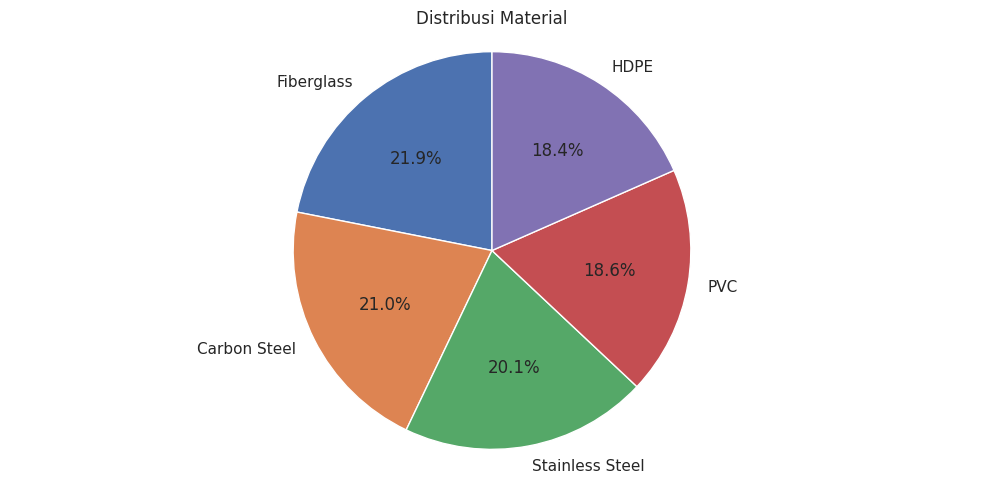

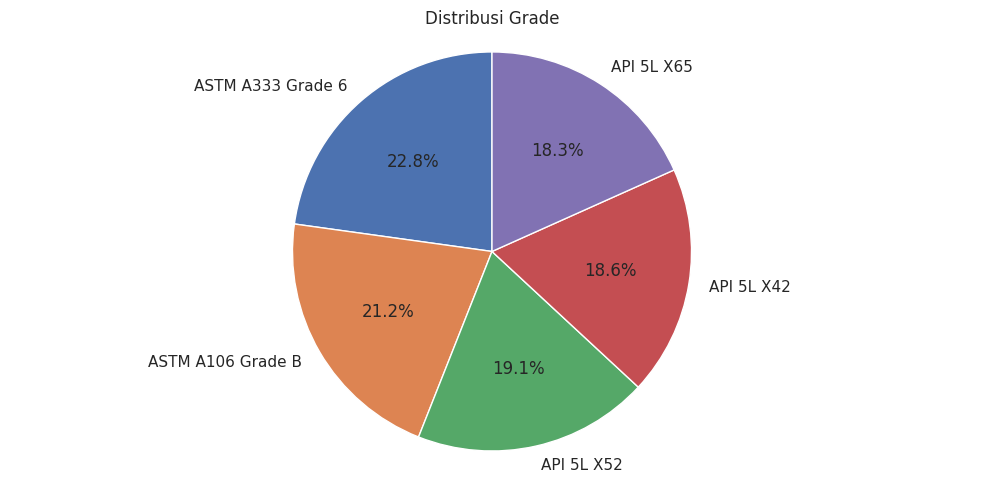

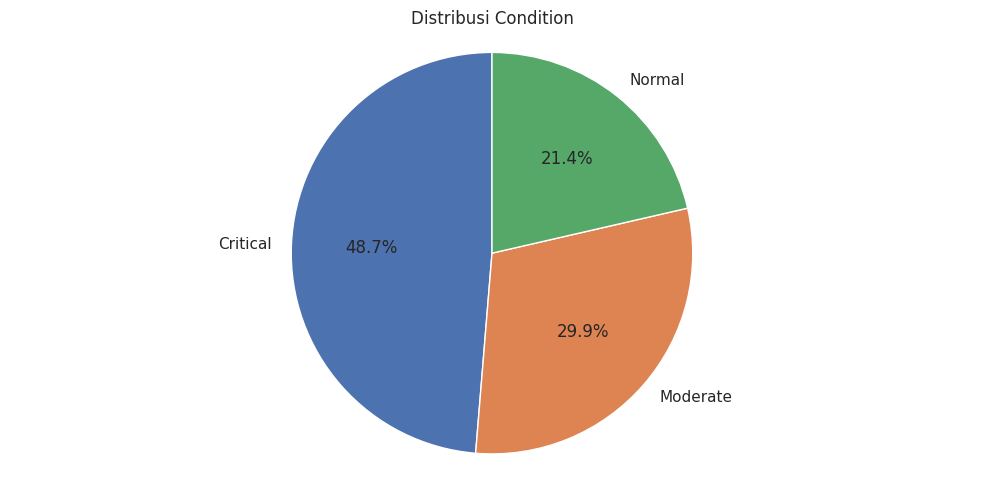

In [9]:
key_columns = ["Material", "Grade", "Condition"]

for col in key_columns:
    if col in df.columns:
        vc = df[col].value_counts()

        plt.figure()
        plt.pie(
            vc,
            labels=vc.index,
            autopct='%1.1f%%',
            startangle=90
        )
        plt.title(f"Distribusi {col}")
        plt.axis('equal')  # supaya pie bulat
        plt.tight_layout()
        plt.show()

dapat dilihat dari inspeksi awal bahwa ditribusi untuk kolom material dan grade memiliki perbedaan dalam jumlah puluhan . sementara untuk kolom target yaitu distribusi memiliki nilai yang lebih bervariasi dan banyak pada kondisi critical sejumlah 487 

In [10]:
df_model = df 

In [11]:
df_model 

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.4800,Carbon Steel,ASTM A333 Grade 6,300,84.9000,16.0400,4.9100,31.7200,2,Moderate
1,800,22.0000,PVC,ASTM A106 Grade B,150,14.1000,7.3800,7.3200,33.2700,4,Critical
2,400,12.0500,Carbon Steel,API 5L X52,2500,0.6000,2.1200,6.3200,52.4500,7,Critical
3,1500,38.7200,Carbon Steel,API 5L X42,1500,52.7000,5.5800,6.2000,16.0100,19,Critical
4,1500,24.3200,HDPE,API 5L X65,1500,11.7000,12.2900,8.5800,35.2800,20,Critical
...,...,...,...,...,...,...,...,...,...,...,...
995,1500,34.8500,PVC,API 5L X65,150,96.2000,5.1600,9.9800,28.6400,15,Critical
996,800,12.5300,Carbon Steel,ASTM A333 Grade 6,150,6.5000,6.5400,1.0700,8.5400,23,Normal
997,100,6.7700,PVC,ASTM A106 Grade B,600,44.7000,15.9000,6.2200,91.8800,15,Critical
998,300,15.0500,HDPE,API 5L X42,600,37.9000,6.6000,5.3900,35.8100,12,Critical


### Sebelum Cleaning 

In [12]:
print("Shape sebelum cleaning:", df_model.shape)
df_model.head()

Shape sebelum cleaning: (1000, 11)


,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.4800,Carbon Steel,ASTM A333 Grade 6,300,84.9000,16.0400,4.9100,31.7200,2,Moderate
1,800,22.0000,PVC,ASTM A106 Grade B,150,14.1000,7.3800,7.3200,33.2700,4,Critical
2,400,12.0500,Carbon Steel,API 5L X52,2500,0.6000,2.1200,6.3200,52.4500,7,Critical
3,1500,38.7200,Carbon Steel,API 5L X42,1500,52.7000,5.5800,6.2000,16.0100,19,Critical
4,1500,24.3200,HDPE,API 5L X65,1500,11.7000,12.2900,8.5800,35.2800,20,Critical


### Domain Logic Validation

1. **Ketebalan pipa harus bernilai positif**
   Mengecek bahwa `Thickness_mm > 0`, karena ketebalan pipa tidak mungkin nol atau negatif secara fisik.

2. **Kehilangan ketebalan tidak boleh negatif**
   Mengecek bahwa `Thickness_Loss_mm ≥ 0`, memastikan korosi atau degradasi tidak menghasilkan nilai kehilangan yang tidak logis.

3. **Kehilangan ketebalan tidak melebihi ketebalan awal**
   Mengecek bahwa `Thickness_Loss_mm ≤ Thickness_mm`, untuk menjaga konsistensi struktural dan menghindari data yang secara fisik mustahil.

4. **Umur pipa tidak boleh negatif**
   Mengecek bahwa `Time_Years ≥ 0`, karena umur operasi pipeline selalu dihitung dari nol ke atas.


In [13]:
# Domain Logic Validation
domain_checks = {
    "Thickness_mm > 0": (df_model["Thickness_mm"] > 0).all(),
    "Thickness_Loss_mm >= 0": (df_model["Thickness_Loss_mm"] >= 0).all(),
    "Thickness_Loss_mm <= Thickness_mm": (
        df_model["Thickness_Loss_mm"] <= df_model["Thickness_mm"]
    ).all(),
    "Time_Years >= 0": (df_model["Time_Years"] >= 0).all()
}

pd.DataFrame.from_dict(domain_checks, orient="index", columns=["Valid"])

,Valid
Thickness_mm > 0,True
Thickness_Loss_mm >= 0,True
Thickness_Loss_mm <= Thickness_mm,False
Time_Years >= 0,True


### Outlier Detection dengan IQR

Interquartile Range (IQR) digunakan untuk mendeteksi nilai ekstrem tanpa mengasumsikan distribusi data tertentu.  
IQR dihitung sebagai selisih antara kuartil ketiga (Q3) dan kuartil pertama (Q1).

Sebuah nilai dianggap outlier jika:
- Nilai < Q1 − 1.5 × IQR  
- Nilai > Q3 + 1.5 × IQR  

Metode IQR cocok untuk data engineering karena robust terhadap distribusi skewed dan tidak sensitif terhadap nilai ekstrem.


In [14]:
numeric_cols = df_model.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols.remove("Time_Years")  # opsional: time sering memang skewed

outlier_summary = {}

for col in numeric_cols:
    Q1 = df_model[col].quantile(0.25)
    Q3 = df_model[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df_model[col] < lower) | (df_model[col] > upper)).sum()
    outlier_summary[col] = outlier_count

pd.DataFrame.from_dict(outlier_summary, orient="index", columns=["Outlier_Count"])

,Outlier_Count
Pipe_Size_mm,0
Thickness_mm,11
Max_Pressure_psi,0
Temperature_C,0
Corrosion_Impact_Percent,0
Thickness_Loss_mm,0
Material_Loss_Percent,70


terlihat beberapa kolom memiliki outlier , tapi saya memutuskan untuk tidak menghilangkan atau melakukan treatment pada outlier tersebut secara khusus karena masih bisa diobservasi dan dari segi jumlah tidak terlalu banyak 

### Cleaning berdasarkan validasi 

In [15]:
initial_rows = len(df_model)

df_model_clean = df_model[
    (df_model["Thickness_mm"] > 0) &
    (df_model["Thickness_Loss_mm"] >= 0) &
    (df_model["Thickness_Loss_mm"] <= df_model["Thickness_mm"]) &
    (df_model["Time_Years"] >= 0)
].copy()

final_rows = len(df_model_clean)

print(f"Rows sebelum cleaning : {initial_rows}")
print(f"Rows setelah cleaning : {final_rows}")
print(f"Rows dihapus          : {initial_rows - final_rows}")

Rows sebelum cleaning : 1000
Rows setelah cleaning : 881
Rows dihapus          : 119


### cek distribusi target 

In [16]:
condition_counts = df_model_clean["Condition"].value_counts()

condition_counts

Condition
Critical    375
Moderate    292
Normal      214
Name: count, dtype: int64

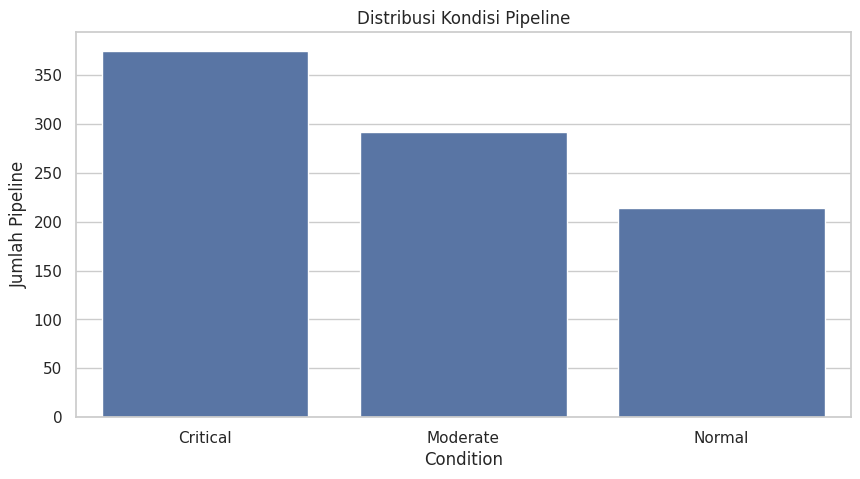

In [17]:
plt.figure()
sns.countplot(
    data=df_model_clean,
    x="Condition",
    order=condition_counts.index
)
plt.title("Distribusi Kondisi Pipeline")
plt.xlabel("Condition")
plt.ylabel("Jumlah Pipeline")
plt.show()

### Pipe Size vs Condition

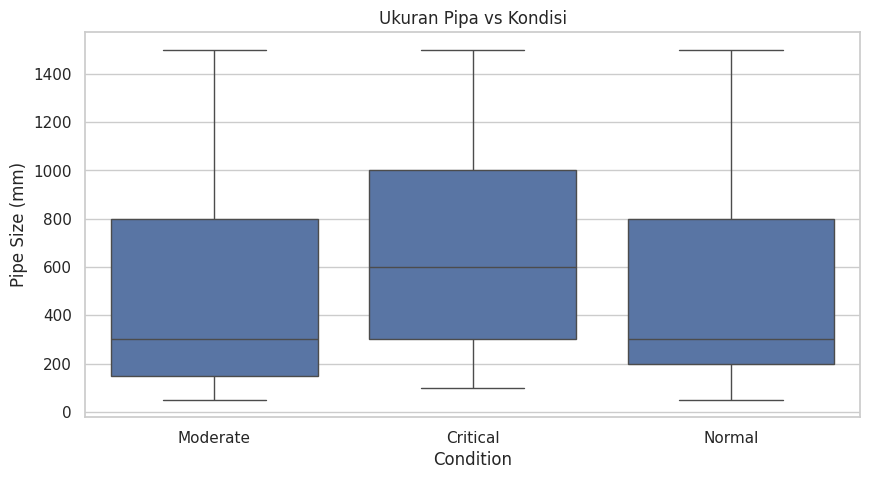

In [18]:
if "Pipe_Size_mm" in df_model_clean.columns:
    plt.figure()
    sns.boxplot(
        data=df_model_clean,
        x="Condition",
        y="Pipe_Size_mm"
    )
    plt.title("Ukuran Pipa vs Kondisi")
    plt.xlabel("Condition")
    plt.ylabel("Pipe Size (mm)")
    plt.show()
else:
    print("Kolom 'Pipe_Size_mm' tidak tersedia di df_model_clean, analisis dilewati.")


### Thickness vs Condition

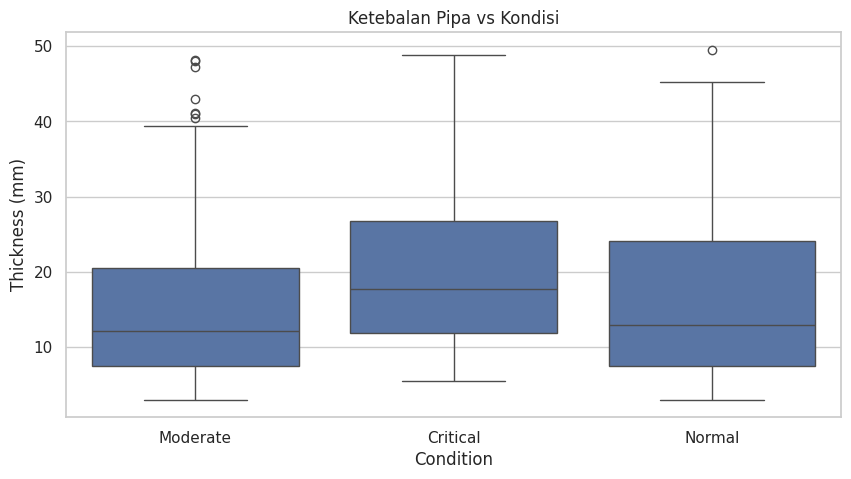

In [19]:
if "Thickness_mm" in df_model_clean.columns:
    plt.figure()
    sns.boxplot(
        data=df_model_clean,
        x="Condition",
        y="Thickness_mm"
    )
    plt.title("Ketebalan Pipa vs Kondisi")
    plt.xlabel("Condition")
    plt.ylabel("Thickness (mm)")
    plt.show()
else:
    print("Kolom 'Thickness_mm' tidak tersedia.")


### Thickness Loss vs Condition

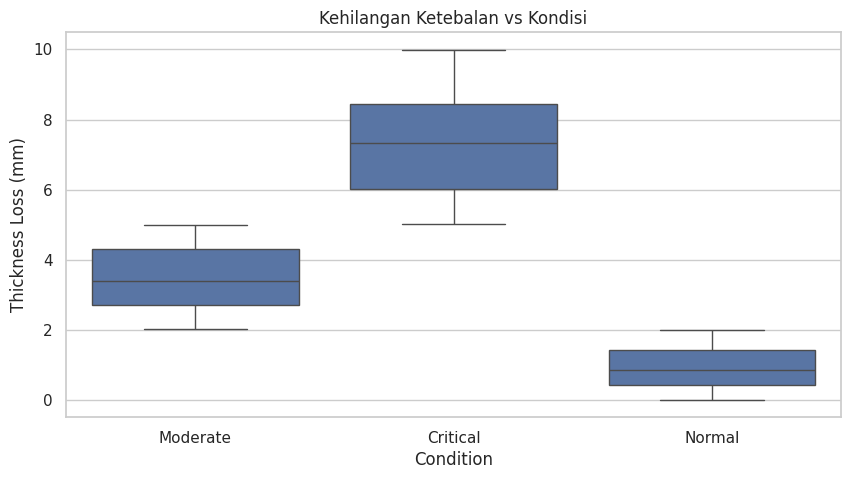

In [20]:
if "Thickness_Loss_mm" in df_model_clean.columns:
    plt.figure()
    sns.boxplot(
        data=df_model_clean,
        x="Condition",
        y="Thickness_Loss_mm"
    )
    plt.title("Kehilangan Ketebalan vs Kondisi")
    plt.xlabel("Condition")
    plt.ylabel("Thickness Loss (mm)")
    plt.show()
else:
    print("Kolom 'Thickness_Loss_mm' tidak tersedia.")

### Time in Service vs Condition

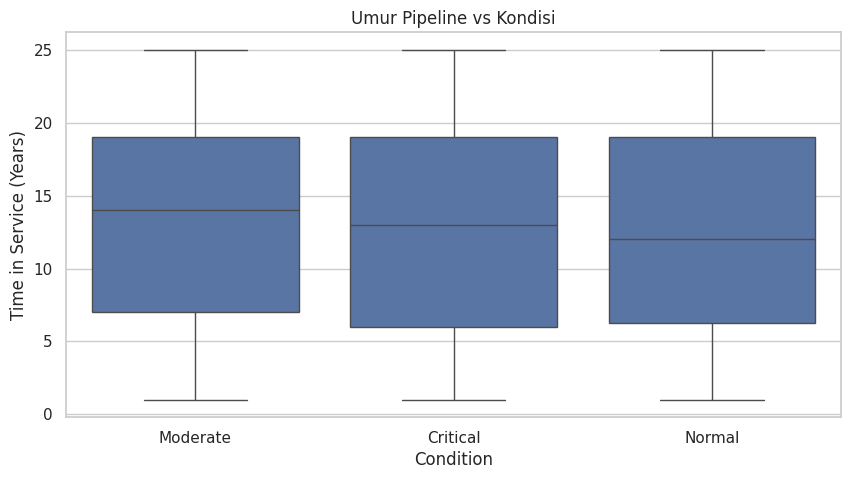

In [21]:
if "Time_Years" in df_model_clean.columns:
    plt.figure()
    sns.boxplot(
        data=df_model_clean,
        x="Condition",
        y="Time_Years"
    )
    plt.title("Umur Pipeline vs Kondisi")
    plt.xlabel("Condition")
    plt.ylabel("Time in Service (Years)")
    plt.show()
else:
    print("Kolom 'Time_Years' tidak tersedia.")

### Material vs Condition

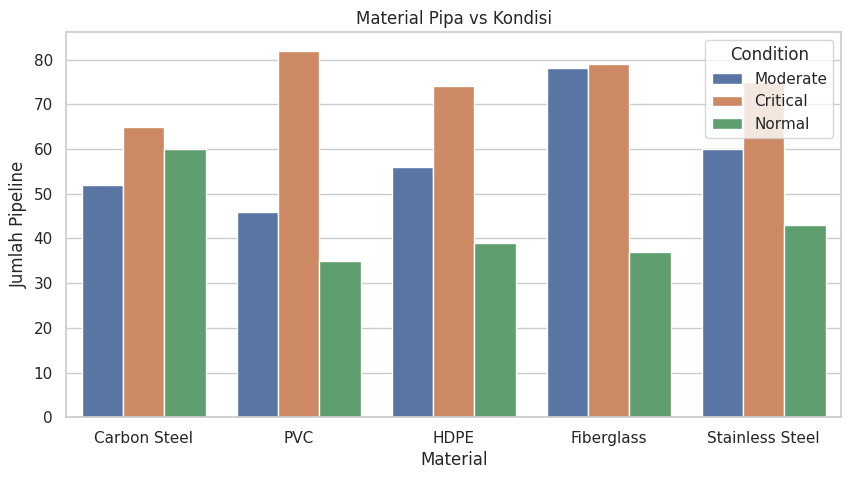

In [22]:
if "Material" in df_model_clean.columns:
    plt.figure()
    sns.countplot(
        data=df_model_clean,
        x="Material",
        hue="Condition"
    )
    plt.title("Material Pipa vs Kondisi")
    plt.xlabel("Material")
    plt.ylabel("Jumlah Pipeline")
    plt.legend(title="Condition")
    plt.show()
else:
    print("Kolom 'Material' tidak tersedia.")

### Grade vs Condition

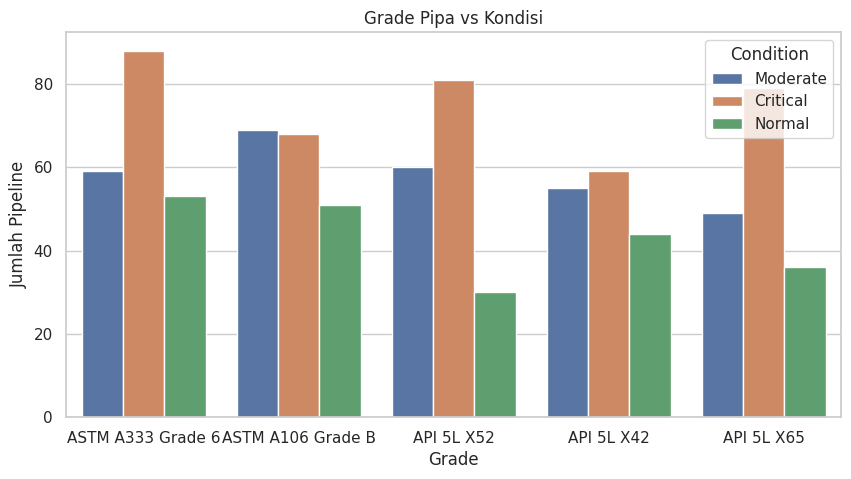

In [23]:
if "Grade" in df_model_clean.columns:
    plt.figure()
    sns.countplot(
        data=df_model_clean,
        x="Grade",
        hue="Condition"
    )
    plt.title("Grade Pipa vs Kondisi")
    plt.xlabel("Grade")
    plt.ylabel("Jumlah Pipeline")
    plt.legend(title="Condition")
    plt.show()
else:
    print("Kolom 'Grade' tidak tersedia.")

### Correlation Heatmap 

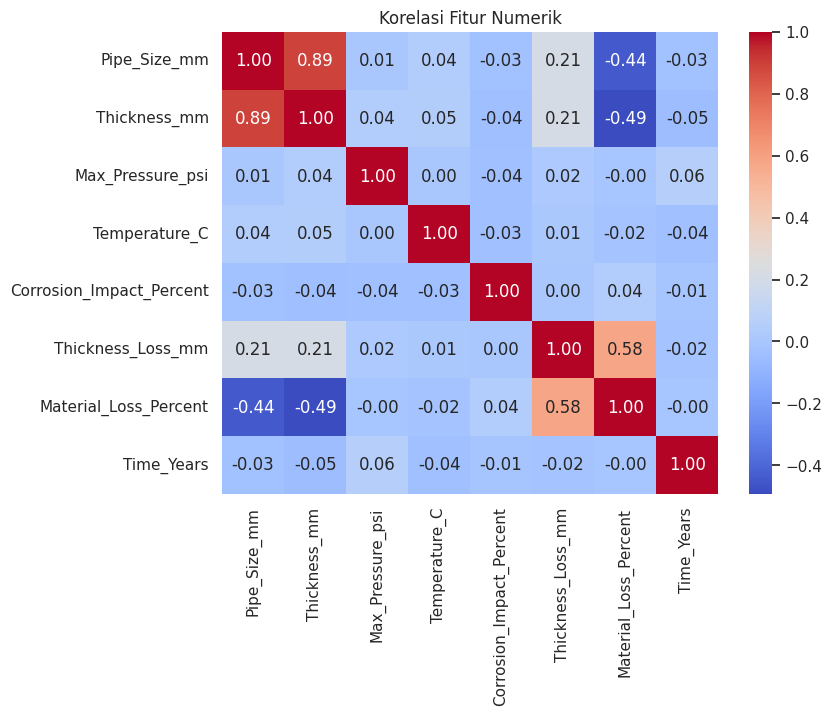

In [24]:
numeric_cols = df_model_clean.select_dtypes(include=["int64", "float64"])

if not numeric_cols.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        numeric_cols.corr(),
        annot=True,
        fmt=".2f",
        cmap="coolwarm"
    )
    plt.title("Korelasi Fitur Numerik")
    plt.show()
else:
    print("Tidak ada kolom numerik untuk korelasi.")

## Feature Engineering & Target Encoding

In [26]:
TARGET_COL = "Condition"

X = df_model_clean.drop(columns=[TARGET_COL])
y = df_model_clean[TARGET_COL]

print("Shape X:", X.shape)
print("Shape y:", y.shape)
y.value_counts()

Shape X: (881, 10)
Shape y: (881,)


Condition
Critical    375
Moderate    292
Normal      214
Name: count, dtype: int64

In [27]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numeric features:")
print(numeric_features)

print("\nCategorical features:")
print(categorical_features)

Numeric features:
['Pipe_Size_mm', 'Thickness_mm', 'Max_Pressure_psi', 'Temperature_C', 'Corrosion_Impact_Percent', 'Thickness_Loss_mm', 'Material_Loss_Percent', 'Time_Years']

Categorical features:
['Material', 'Grade']


### Feature Engineering: Thickness Loss Ratio

Pada tahap ini dibuat fitur turunan `Thickness_Loss_Ratio` yang merepresentasikan rasio kehilangan ketebalan terhadap ketebalan awal pipa.  
Fitur ini memberikan ukuran degradasi yang bersifat relatif, sehingga lebih informatif dibandingkan nilai kehilangan absolut.

Rasio dihitung sebagai:
- `Thickness_Loss_mm / Thickness_mm`

Nilai tak terhingga atau tidak valid akibat pembagian ditangani untuk menjaga kualitas data.  
Fitur ini tetap mempertahankan informasi domain asli dan relevan secara engineering.

In [28]:
X_fe = X.copy()

# Rasio kehilangan ketebalan terhadap ketebalan awal
X_fe["Thickness_Loss_Ratio"] = (
    X_fe["Thickness_Loss_mm"] / X_fe["Thickness_mm"]
)

# Pastikan tidak ada inf atau NaN akibat pembagian
X_fe["Thickness_Loss_Ratio"] = X_fe["Thickness_Loss_Ratio"].replace(
    [np.inf, -np.inf], np.nan
)

X_fe["Thickness_Loss_Ratio"].describe()

count   881.0000
mean      0.3297
std       0.2465
min       0.0008
25%       0.1349
50%       0.2788
75%       0.4773
max       0.9933
Name: Thickness_Loss_Ratio, dtype: float64

In [29]:
numeric_features = X_fe.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_fe.select_dtypes(include=["object", "category"]).columns.tolist()

print("Updated numeric features:")
print(numeric_features)

print("\nCategorical features:")
print(categorical_features)

Updated numeric features:
['Pipe_Size_mm', 'Thickness_mm', 'Max_Pressure_psi', 'Temperature_C', 'Corrosion_Impact_Percent', 'Thickness_Loss_mm', 'Material_Loss_Percent', 'Time_Years', 'Thickness_Loss_Ratio']

Categorical features:
['Material', 'Grade']


In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Mapping label → angka
label_mapping = dict(
    zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))
)

print("Target label mapping:")
label_mapping

Target label mapping:


{'Critical': np.int64(0), 'Moderate': np.int64(1), 'Normal': np.int64(2)}

In [31]:
X_encoded = pd.get_dummies(
    X_fe,
    columns=categorical_features,
    drop_first=False
)

print("Shape setelah encoding:", X_encoded.shape)
X_encoded.head()

Shape setelah encoding: (881, 19)


,Pipe_Size_mm,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Thickness_Loss_Ratio,Material_Carbon Steel,Material_Fiberglass,Material_HDPE,Material_PVC,Material_Stainless Steel,Grade_API 5L X42,Grade_API 5L X52,Grade_API 5L X65,Grade_ASTM A106 Grade B,Grade_ASTM A333 Grade 6
0,800,15.4800,300,84.9000,16.0400,4.9100,31.7200,2,0.3172,True,False,False,False,False,False,False,False,False,True
1,800,22.0000,150,14.1000,7.3800,7.3200,33.2700,4,0.3327,False,False,False,True,False,False,False,False,True,False
2,400,12.0500,2500,0.6000,2.1200,6.3200,52.4500,7,0.5245,True,False,False,False,False,False,True,False,False,False
3,1500,38.7200,1500,52.7000,5.5800,6.2000,16.0100,19,0.1601,True,False,False,False,False,True,False,False,False,False
4,1500,24.3200,1500,11.7000,12.2900,8.5800,35.2800,20,0.3528,False,False,True,False,False,False,False,True,False,False


In [32]:
print("Final feature matrix shape:", X_encoded.shape)
print("Final target shape:", y_encoded.shape)

assert X_encoded.isnull().sum().sum() == 0, "Masih ada missing values"

Final feature matrix shape: (881, 19)
Final target shape: (881,)


## Train-Test Split & Scaling

In [33]:
print("X shape:", X_encoded.shape)
print("y shape:", y_encoded.shape)

# Pastikan jumlah baris konsisten
assert X_encoded.shape[0] == y_encoded.shape[0], "Jumlah baris X dan y tidak sama"

X shape: (881, 19)
y shape: (881,)


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y_encoded,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y_encoded
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (704, 19)
Test shape : (177, 19)


In [35]:
dist = pd.DataFrame({
    "train": pd.Series(y_train).value_counts(normalize=True),
    "test": pd.Series(y_test).value_counts(normalize=True)
}).fillna(0)

dist

,train,test
0,0.4261,0.4237
1,0.3310,0.3333
2,0.2429,0.2429


tidak ada perbedaan terlalu jauh antara komposisi train dan test pada masing masing kelas sehingga split valid dan evaluasi model lebih adil 

In [36]:
from sklearn.preprocessing import StandardScaler

numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Numeric features to scale:")
numeric_features

Numeric features to scale:


['Pipe_Size_mm',
 'Thickness_mm',
 'Max_Pressure_psi',
 'Temperature_C',
 'Corrosion_Impact_Percent',
 'Thickness_Loss_mm',
 'Material_Loss_Percent',
 'Time_Years',
 'Thickness_Loss_Ratio']

In [37]:
scaler = StandardScaler()

# Fit hanya pada data train
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(
    X_train[numeric_features]
)

# Transform data test menggunakan scaler yang sama
X_test_scaled[numeric_features] = scaler.transform(
    X_test[numeric_features]
)

print("Scaling selesai")

Scaling selesai


In [38]:
X_train_scaled[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Pipe_Size_mm,704.0000,0.0000,1.0007,-1.1710,-0.8316,-0.3790,0.5262,2.1103
Thickness_mm,704.0000,-0.0000,1.0007,-1.3684,-0.8228,-0.2696,0.6450,3.1030
Max_Pressure_psi,704.0000,-0.0000,1.0007,-1.0706,-0.8844,-0.1398,0.6048,1.8459
Temperature_C,704.0000,-0.0000,1.0007,-2.2354,-0.7260,-0.0521,0.6427,2.5453
Corrosion_Impact_Percent,704.0000,0.0000,1.0007,-1.7320,-0.9079,-0.0084,0.8517,1.7714
Thickness_Loss_mm,704.0000,-0.0000,1.0007,-1.5964,-0.8500,-0.0288,0.8663,1.9414
Material_Loss_Percent,704.0000,-0.0000,1.0007,-1.3585,-0.7737,-0.2022,0.6270,2.6933
Time_Years,704.0000,0.0000,1.0007,-1.6553,-0.9549,0.0257,0.8661,1.7066
Thickness_Loss_Ratio,704.0000,-0.0000,1.0007,-1.3586,-0.7735,-0.2021,0.6269,2.6934


dapat dilihat pada tabel bahwa kita sudah berhasil mengaplikasikan scaling dengan baik 

In [39]:
print("Final Train shape:", X_train_scaled.shape)
print("Final Test shape :", X_test_scaled.shape)

# Safety check
assert X_train_scaled.isnull().sum().sum() == 0
assert X_test_scaled.isnull().sum().sum() == 0

Final Train shape: (704, 19)
Final Test shape : (177, 19)


## Baseline Modeling (Logistic Regression & Random Forest)

In [40]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(
    max_iter=1000,
    random_state=RANDOM_STATE,
    multi_class="auto"
)

logreg_model.fit(X_train_scaled, y_train)

print("Logistic Regression training selesai")

Logistic Regression training selesai


In [41]:
from sklearn.metrics import classification_report

y_pred_logreg = logreg_model.predict(X_test_scaled)

print("Logistic Regression — Classification Report")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression — Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.91      0.86      0.89        59
           2       0.87      0.93      0.90        43

    accuracy                           0.93       177
   macro avg       0.92      0.92      0.92       177
weighted avg       0.93      0.93      0.93       177



In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)

print("Random Forest training selesai")

Random Forest training selesai


In [43]:
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest — Classification Report")
print(classification_report(y_test, y_pred_rf))

Random Forest — Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        43

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177



In [44]:
from sklearn.metrics import f1_score

baseline_comparison = {
    "Logistic Regression (macro F1)": f1_score(y_test, y_pred_logreg, average="macro"),
    "Random Forest (macro F1)": f1_score(y_test, y_pred_rf, average="macro"),
}

baseline_comparison

{'Logistic Regression (macro F1)': 0.9197220865222819,
 'Random Forest (macro F1)': 1.0}

## Model Evaluation & Visualization

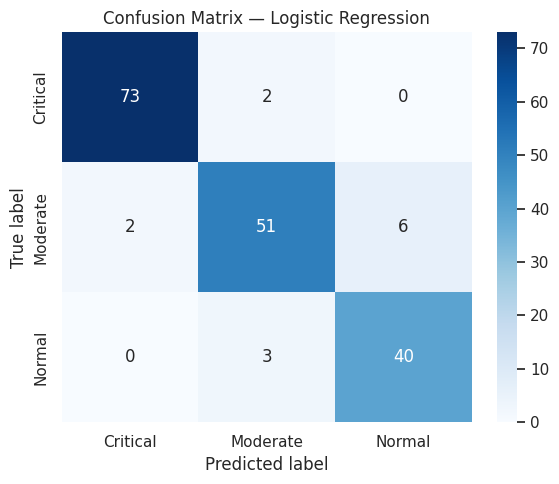

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Hitung confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plot dengan seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_logreg,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix — Logistic Regression")
plt.tight_layout()
plt.show()

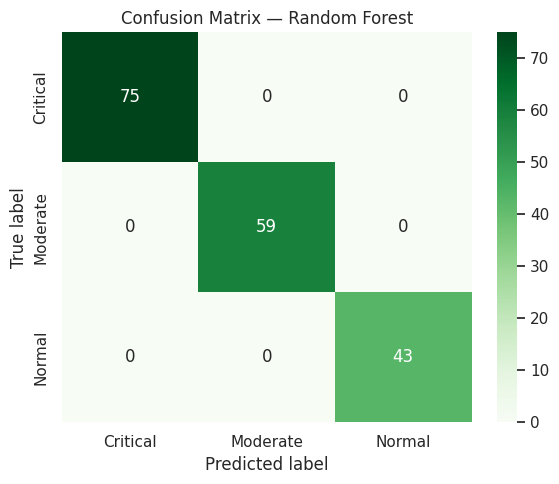

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi
y_pred_rf = rf_model.predict(X_test_scaled)

# Hitung confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot dengan seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix — Random Forest")
plt.tight_layout()
plt.show()

In [47]:
from sklearn.metrics import classification_report

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_logreg, target_names=label_encoder.classes_))

print("\nRandom Forest Report")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

Logistic Regression Report
              precision    recall  f1-score   support

    Critical       0.97      0.97      0.97        75
    Moderate       0.91      0.86      0.89        59
      Normal       0.87      0.93      0.90        43

    accuracy                           0.93       177
   macro avg       0.92      0.92      0.92       177
weighted avg       0.93      0.93      0.93       177


Random Forest Report
              precision    recall  f1-score   support

    Critical       1.00      1.00      1.00        75
    Moderate       1.00      1.00      1.00        59
      Normal       1.00      1.00      1.00        43

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177



In [48]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

metrics_summary = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_rf),
    ],
    "Macro Precision": [
        precision_score(y_test, y_pred_logreg, average="macro"),
        precision_score(y_test, y_pred_rf, average="macro"),
    ],
    "Macro Recall": [
        recall_score(y_test, y_pred_logreg, average="macro"),
        recall_score(y_test, y_pred_rf, average="macro"),
    ],
    "Macro F1": [
        f1_score(y_test, y_pred_logreg, average="macro"),
        f1_score(y_test, y_pred_rf, average="macro"),
    ],
}

pd.DataFrame(metrics_summary)

,Model,Accuracy,Macro Precision,Macro Recall,Macro F1
0,Logistic Regression,0.9266,0.9179,0.9227,0.9197
1,Random Forest,1.0000,1.0000,1.0000,1.0000


In [49]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize target
y_test_bin = label_binarize(y_test, classes=range(len(label_encoder.classes_)))

# Probabilitas prediksi
y_prob_logreg = logreg_model.predict_proba(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)

roc_auc_logreg = roc_auc_score(
    y_test_bin,
    y_prob_logreg,
    average="macro",
    multi_class="ovr"
)

roc_auc_rf = roc_auc_score(
    y_test_bin,
    y_prob_rf,
    average="macro",
    multi_class="ovr"
)

print("ROC-AUC Macro (Logistic Regression):", roc_auc_logreg)
print("ROC-AUC Macro (Random Forest):", roc_auc_rf)

ROC-AUC Macro (Logistic Regression): 0.994374223798202
ROC-AUC Macro (Random Forest): 1.0


## Hyperparameter Tuning (Random Forest)

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    "n_estimators": [200, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

param_dist

{'n_estimators': [200, 300, 500],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['sqrt', 'log2']}

In [52]:
rf_tuner = RandomizedSearchCV(
    estimator=RandomForestClassifier(
        random_state=RANDOM_STATE,
        n_jobs=-1
    ),
    param_distributions=param_dist,
    n_iter=25,
    scoring="f1_macro",
    cv=5,
    random_state=RANDOM_STATE,
    verbose=1,
    n_jobs=-1
)

rf_tuner

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 300, 500]},
                   random_state=42, scoring='f1_macro', verbose=1)

In [53]:
rf_tuner.fit(X_train_scaled, y_train)

print("Hyperparameter tuning selesai")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Hyperparameter tuning selesai


In [54]:
best_params = rf_tuner.best_params_
best_cv_score = rf_tuner.best_score_

print("Best parameters:")
best_params

print("\nBest CV macro F1 score:")
best_cv_score

Best parameters:

Best CV macro F1 score:


np.float64(0.9966064414768263)

In [55]:
rf_best = rf_tuner.best_estimator_

rf_best

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [56]:
from sklearn.metrics import classification_report, f1_score

y_pred_rf_best = rf_best.predict(X_test_scaled)

print("Random Forest Tuned — Classification Report")
print(classification_report(y_test, y_pred_rf_best, target_names=label_encoder.classes_))

print("Macro F1 (Baseline RF):", f1_score(y_test, y_pred_rf, average="macro"))
print("Macro F1 (Tuned RF)   :", f1_score(y_test, y_pred_rf_best, average="macro"))

Random Forest Tuned — Classification Report
              precision    recall  f1-score   support

    Critical       1.00      1.00      1.00        75
    Moderate       1.00      1.00      1.00        59
      Normal       1.00      1.00      1.00        43

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177

Macro F1 (Baseline RF): 1.0
Macro F1 (Tuned RF)   : 1.0


In [57]:
print("CV Score (macro F1):", best_cv_score)
print("Test Score (macro F1):", f1_score(y_test, y_pred_rf_best, average="macro"))

CV Score (macro F1): 0.9966064414768263
Test Score (macro F1): 1.0


In [58]:
import pandas as pd
import plotly.express as px

# Ambil hasil RandomizedSearchCV
results = pd.DataFrame(rf_tuner.cv_results_)

# Buang max_depth = None (tidak bisa diplot numerik)
results_3d = results[results["param_max_depth"].notna()].copy()

# Pastikan tipe numerik
results_3d["param_n_estimators"] = results_3d["param_n_estimators"].astype(int)
results_3d["param_max_depth"] = results_3d["param_max_depth"].astype(int)
results_3d["param_min_samples_leaf"] = results_3d["param_min_samples_leaf"].astype(int)

# Buat plot 3D interaktif
fig = px.scatter_3d(
    results_3d,
    x="param_n_estimators",
    y="param_max_depth",
    z="param_min_samples_leaf",
    color="mean_test_score",
    color_continuous_scale="Viridis",
    size="mean_test_score",
    hover_data={
        "mean_test_score": ":.4f",
        "param_min_samples_split": True,
        "param_max_features": True
    },
    labels={
        "param_n_estimators": "n_estimators",
        "param_max_depth": "max_depth",
        "param_min_samples_leaf": "min_samples_leaf",
        "mean_test_score": "Mean CV Macro F1"
    },
    title="3D Hyperparameter Search Space vs CV Macro F1 (Random Forest)"
)

fig.show()


## Feature Importance & Interpretability

In [59]:
import pandas as pd

feature_importance = pd.DataFrame({
    "feature": X_train_scaled.columns,
    "importance": rf_best.feature_importances_
}).sort_values(by="importance", ascending=False)

feature_importance.head(10)

,feature,importance
5,Thickness_Loss_mm,0.5303
6,Material_Loss_Percent,0.1523
8,Thickness_Loss_Ratio,0.1463
1,Thickness_mm,0.0753
0,Pipe_Size_mm,0.0407
3,Temperature_C,0.0124
4,Corrosion_Impact_Percent,0.0123
7,Time_Years,0.0095
2,Max_Pressure_psi,0.0052
10,Material_Fiberglass,0.0026


terlihat bahwa thickness loss memiliki tingkat signifikansi yang tinggi dalam penentuan output model dan menjadi faktor yang dominan mempengaruhi hasil 

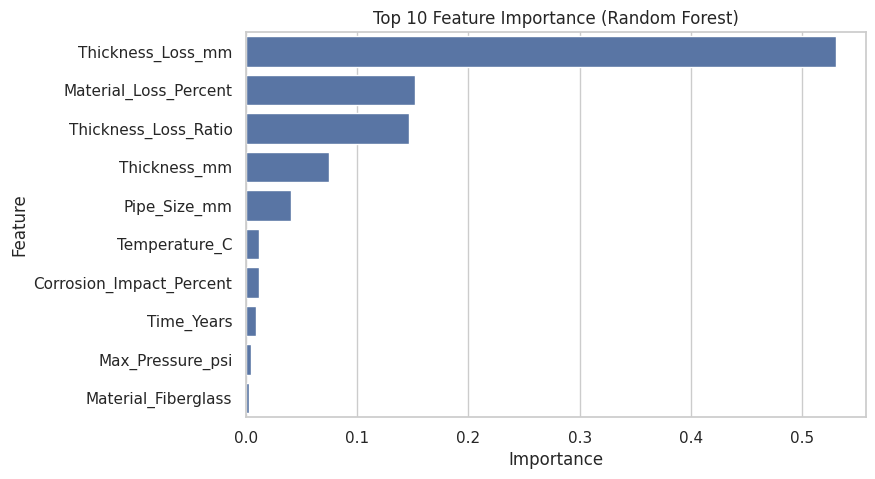

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 10
top_features = feature_importance.head(top_n)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_features,
    x="importance",
    y="feature"
)
plt.title(f"Top {top_n} Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [62]:
def group_feature(feature_name):
    if "Thickness" in feature_name:
        return "Thickness-related"
    elif "Loss" in feature_name:
        return "Loss-related"
    elif "Corrosion" in feature_name:
        return "Corrosion-related"
    elif "Pressure" in feature_name:
        return "Pressure-related"
    elif "Temperature" in feature_name:
        return "Temperature-related"
    elif "Material_" in feature_name or "Grade_" in feature_name:
        return "Material / Grade"
    else:
        return "Other"

feature_importance["group"] = feature_importance["feature"].apply(group_feature)

grouped_importance = (
    feature_importance
    .groupby("group")["importance"]
    .sum()
    .sort_values(ascending=False)
)

grouped_importance

group
Thickness-related     0.7519
Loss-related          0.1523
Other                 0.0503
Material / Grade      0.0156
Temperature-related   0.0124
Corrosion-related     0.0123
Pressure-related      0.0052
Name: importance, dtype: float64

thickness related feature memiliki kontribusi besar dibanding grouped feature lainnya 

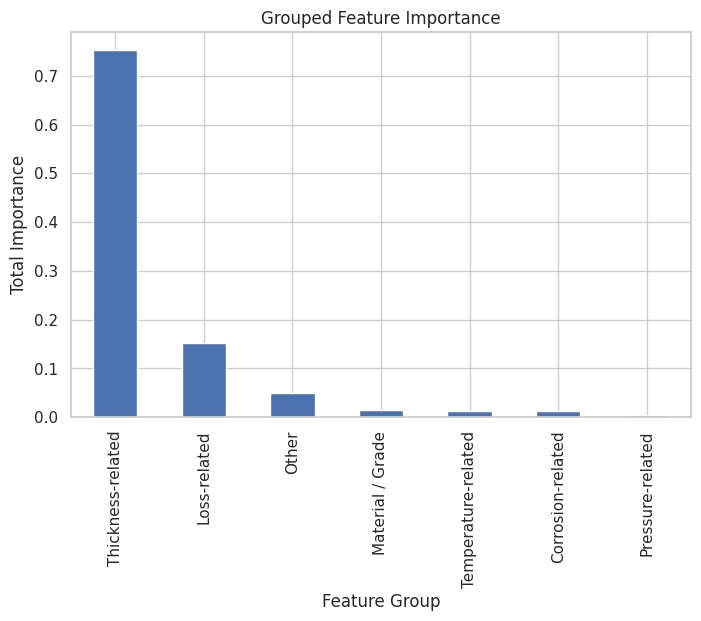

In [63]:
plt.figure(figsize=(8, 5))
grouped_importance.plot(kind="bar")
plt.title("Grouped Feature Importance")
plt.xlabel("Feature Group")
plt.ylabel("Total Importance")
plt.show()

## Model Inference & Prediction Pipeline

In [65]:
import joblib

joblib.dump(rf_best, "rf_model_final.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

print("Model, scaler, dan label encoder berhasil disimpan")

Model, scaler, dan label encoder berhasil disimpan


In [66]:
def preprocess_new_data(df_new, reference_columns, numeric_features, scaler):
    """
    Preprocess data baru agar konsisten dengan data training.
    """
    # One-hot encoding
    df_encoded = pd.get_dummies(df_new, drop_first=False)

    # Pastikan semua kolom training ada
    for col in reference_columns:
        if col not in df_encoded.columns:
            df_encoded[col] = 0

    # Pastikan urutan kolom sama
    df_encoded = df_encoded[reference_columns]

    # Scaling numeric features
    df_encoded[numeric_features] = scaler.transform(
        df_encoded[numeric_features]
    )

    return df_encoded

In [67]:
FEATURE_COLUMNS = X_encoded.columns.tolist()
NUMERIC_FEATURES = X_train_scaled.select_dtypes(
    include=["int64", "float64"]
).columns.tolist()

print("Jumlah fitur:", len(FEATURE_COLUMNS))

Jumlah fitur: 19


In [68]:
new_data = pd.DataFrame([{
    "Thickness_mm": 12.0,
    "Max_Pressure_psi": 900,
    "Temperature_C": 60.0,
    "Corrosion_Impact_Percent": 35.0,
    "Thickness_Loss_mm": 3.5,
    "Material_Loss_Percent": 22.0,
    "Time_Years": 18,
    "Material": "Steel",
    "Grade": "X52"
}])

new_data

,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Material,Grade
0,12.0000,900,60.0000,35.0000,3.5000,22.0000,18,Steel,X52


In [69]:
X_new_processed = preprocess_new_data(
    df_new=new_data,
    reference_columns=FEATURE_COLUMNS,
    numeric_features=NUMERIC_FEATURES,
    scaler=scaler
)

# Prediksi numerik
y_pred_new = rf_best.predict(X_new_processed)

# Probabilitas prediksi
y_prob_new = rf_best.predict_proba(X_new_processed)

# Decode label
predicted_label = label_encoder.inverse_transform(y_pred_new)

predicted_label, y_prob_new

(array(['Moderate'], dtype=object),
 array([[0.01291667, 0.62721429, 0.35986905]]))

In [70]:
result = pd.DataFrame(
    y_prob_new,
    columns=[f"Prob_{cls}" for cls in label_encoder.classes_]
)

result["Predicted_Condition"] = predicted_label

result

,Prob_Critical,Prob_Moderate,Prob_Normal,Predicted_Condition
0,0.0129,0.6272,0.3599,Moderate
